# Python 사용

NameError: name 'pop' is not defined

C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53952 (\N{HANGUL SYLLABLE TEUL}) missing from current font.
  fig.

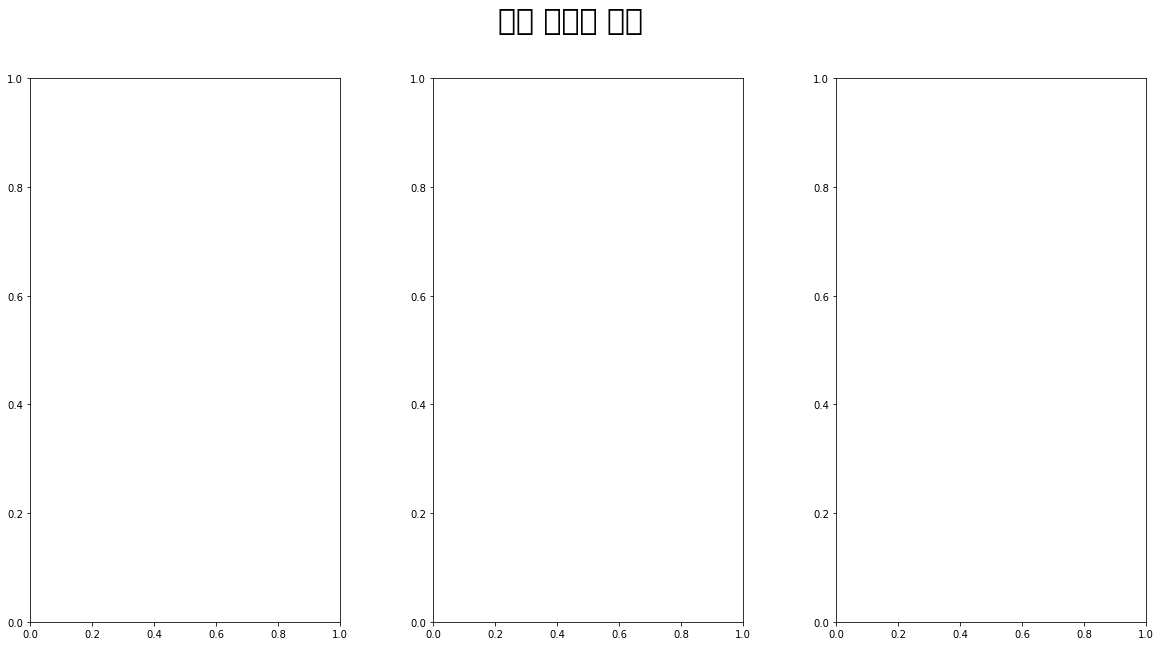

In [1]:
# 모듈 로딩
import csv
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
import re

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('메인 타이틀 제목', fontsize=30)   # 메인타이틀 
fig.subplots_adjust(hspace=0.3, wspace=0.3)   # 그래프마다의 거리 지정
plt.subplot(1,3,1)
plt.pie(pop, autopct='%.1f%%', labels=['남성','여성'], colors=colors, startangle=90)    # 왼쪽 그래프
plt.title('그래프 타이틀')

plt.subplot(1,3,2)
plt.pie(pop, autopct='%.1f%%', labels=['남성','여성'], colors=colors, startangle=90)    # 중앙 그래프
plt.title('그래프 타이틀')

plt.subplot(1,3,3)
plt.pie(pop, autopct='%.1f%%', labels=['남성','여성'], colors=colors, startangle=90)    # 오른쪽 그래프
plt.title('그래프 타이틀')

def get_gender_pop(district):
    fig, axes = plt.subplots(2, 4, figsize=(5, 5))
    fig.suptitle('대구광역시 구별 남녀 인구 비율', fontsize=30)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    colors = ['royalblue', 'orange']
    for i in range(len(district)):
        with open('gender.csv', mode='r', encoding='euc-kr') as f:
            data = csv.reader(f)
            header = next(data)
            male_num_list = []
            female_num_list = []
            male_pop, female_pop = 0, 0
            for row in data:
                if district[i] in row[0]:
                    for male in row[106:207]:
                        if ',' in male:
                            male = male.replace(',', '') # 천단위 콤마 제거
                        male_num_list.append(int(male))    
                    for female in row[209:310]:
                        if ',' in female:
                            female = female.replace(',', '')
                        female_num_list.append(int(female))
                    break    # 한개의 도시 집계 완료되면 break하기
            male_pop = sum(male_num_list)
            female_pop = sum(female_num_list)

            pop = [male_pop, female_pop]
            if platform.system() == 'Windows':
                plt.rc('font', family='Malgun Gothic')
            else:
                plt.rc('font', family='AppleGothic')
            plt.subplot(2,4,i+1)
            plt.pie(pop, autopct='%.1f%%', labels=['남성','여성'], colors=colors, startangle=90)
            plt.title(district[i])
    plt.show()

get_gender_pop(['대구광역시 중구','대구광역시 동구',
                '대구광역시 서구','대구광역시 남구',
                '대구광역시 북구','대구광역시 수성구',
                '대구광역시 달서구','대구광역시'])

# Pandas 사용

In [229]:
import pandas as pd
import re

# 데이터 전처리
genderDF = pd.read_csv('gender.csv', encoding='euc-kr', header = 0, low_memory=False)
city_list = []
for i in range(len(genderDF['행정구역'].to_list())):
    city_list.append(re.split('[()]', genderDF['행정구역'].to_list()[i])[0])
genderDF['행정구역'] = city_list
genderDF = genderDF[[genderDF.columns[0], genderDF.columns[104], genderDF.columns[207]]]
genderDF[genderDF.columns[1]] = genderDF[genderDF.columns[1]].str.replace(',','').astype(int)
genderDF[genderDF.columns[2]] = genderDF[genderDF.columns[2]].str.replace(',','').astype(int)

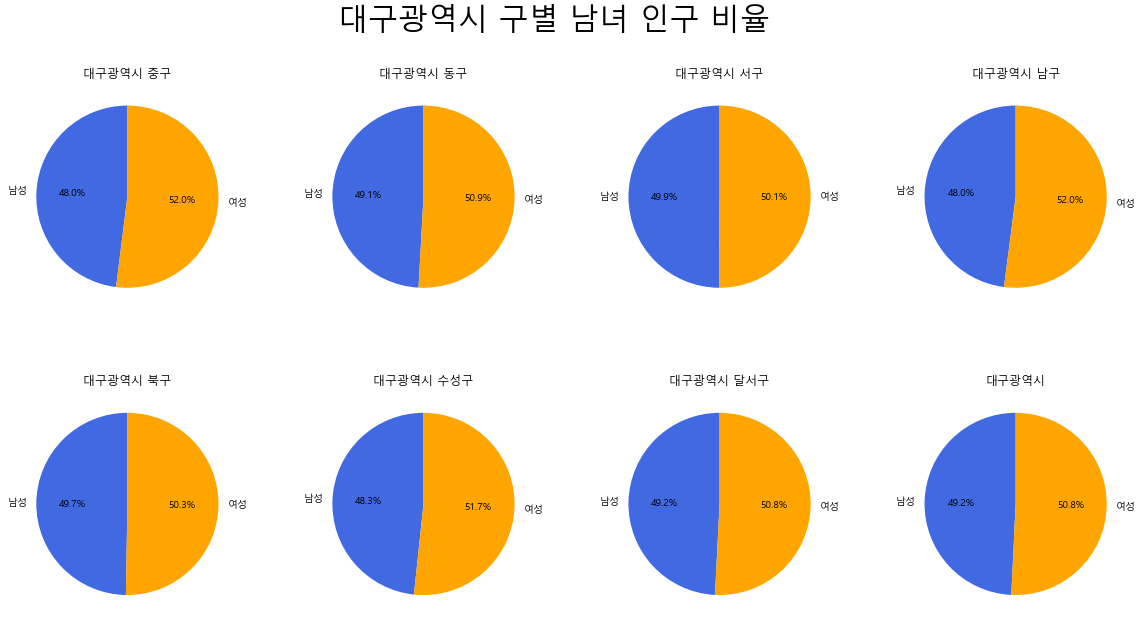

In [230]:
def pop_ratio(city_list):
    global genderDF
    # 그래프 형태 만들기
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('대구광역시 구별 남녀 인구 비율', fontsize=30)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    colors = ['royalblue', 'orange']
    for i in range(len(city_list)):
        if platform.system() == 'Windows':
            plt.rc('font', family='Malgun Gothic')
        else:
            plt.rc('font', family='AppleGothic')
        test = i
        test = genderDF[genderDF['행정구역'].str.contains(city_list[i])].reindex()    # 도시명이 포함된 행
        pop = [test.iloc[0][1], test.iloc[0][2]]    # 여러 행 중 가장 위의것의 남자 총인구, 여자 총인구
        plt.subplot(2,4,i+1)
        plt.pie(pop, autopct='%.1f%%', labels=['남성','여성'], colors=colors, startangle=90)
        plt.title(city_list[i])
    plt.show()

pop_ratio(['대구광역시 중구','대구광역시 동구',
                '대구광역시 서구','대구광역시 남구',
                '대구광역시 북구','대구광역시 수성구',
                '대구광역시 달서구','대구광역시'])